In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#dataset
dataset = pd.read_csv('DataExtract.csv')
dataset.dtypes

Country                                                            object
Air Quality Network                                                object
Air Quality Network Name                                           object
Air Quality Station EoI Code                                       object
Air Quality Station Name                                           object
Sampling Point Id                                                  object
Air Pollutant                                                      object
Air Pollutant Description                                          object
Data Aggregation Process Id                                        object
Data Aggregation Process                                           object
Year                                                                int64
Air Pollution Level                                               float64
Unit Of Air Pollution Level                                        object
Data Coverage                         

In [3]:
#locations check
df_dataset = pd.DataFrame(data=dataset)
unique_locations = df_dataset['Air Quality Station Name'].unique()
unique_locations

array(['Kikinda', 'Pancevo-Sodara', 'Belgrade-Novi Beograd',
       'Belgrade-Vracar', 'Kostolac', 'Smederevo-Carina', 'Valjevo',
       'Bor-Institut', 'Kragujevac', 'Novi Sad-Rumenacka', 'Nis-IZJZ',
       'Novi Sad-Liman', 'Belgrade-Stari grad',
       'Nis-Osnovna skola Sveti Sava', 'Zajecar', 'Cacak-Institut',
       'Novi Sad 2', 'Pancevo 1', 'Kamenicki vis', 'Bor-Gradski park',
       'Belgrade-Mostar', 'Loznica', 'Krusevac', 'Kopaonik', 'Vranje',
       'Smederevo-Centar', 'Obrenovac-Centar', 'Kosjeric', 'Popovac',
       'Uzice', 'Novi Pazar', 'Belgrade-Bulevar Despota Stefana 54a',
       'Belgrade-Slavija', 'Beocin-Centar',
       'Belgrade-Omladinskih brigada', 'Belgrade-Ohridska', 'Sombor 1',
       'Zrenjanin 1', 'Zrenjanin 2', 'Kikinda 1', 'Kikinda 2', nan,
       'Beocin', 'Novi Sad 1', 'Pancevo 2', 'Subotica 1', 'Subotica 2',
       'Belgrade-Kosutnjak', 'Belgrade-Carli Caplina', 'Krusevac-RHMZ',
       'Smederevska Palanka-RHMZ', 'Valjevo-RHMZ', 'Vranje-RHMZ',
       

In [4]:
#years check
unique_years = sorted(df_dataset['Year'].unique())
print(unique_years)

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [5]:
columns_to_drop = ['Country', 'Sampling Point Id', 'Data Aggregation Process Id', 'Data Aggregation Process', 'City', 'City Code', 'City Population', 'Link to raw data (only E1a/validated data from AQ e-Reporting)']
df2 = df_dataset.drop(columns=columns_to_drop)

In [6]:
#dict to organize the data from starting df into separate dataframes based on the year
year_data = {}

for year in range(2003, 2022):
    year_data[f'year_{year}'] = df2[df2['Year'] == year]

In [7]:
#check
for k in year_data:
    print(k)

year_2003
year_2004
year_2005
year_2006
year_2007
year_2008
year_2009
year_2010
year_2011
year_2012
year_2013
year_2014
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020
year_2021


In [8]:
for year, data in year_data.items():
    print(f'{year}: {data.shape}')

year_2003: (175, 18)
year_2004: (352, 18)
year_2005: (376, 18)
year_2006: (364, 18)
year_2007: (352, 18)
year_2008: (314, 18)
year_2009: (276, 18)
year_2010: (386, 18)
year_2011: (655, 18)
year_2012: (681, 18)
year_2013: (741, 18)
year_2014: (631, 18)
year_2015: (764, 18)
year_2016: (550, 18)
year_2017: (529, 18)
year_2018: (733, 18)
year_2019: (1025, 18)
year_2020: (1031, 18)
year_2021: (1094, 18)


In [9]:
years = range(2015, 2022)
unique_locations_by_year = {}

for year in years:
    df_year = year_data[f'year_{year}']
    locations_year = df_year.filter(['Air Quality Station Name'])
    unique_locations = df_year['Air Quality Station Name'].unique()
    unique_locations_by_year[f'locations_{year}'] = locations_year
    unique_locations_by_year[f'unique_locations_{year}'] = unique_locations

#check
for k in unique_locations_by_year:
    print(k)

locations_2015
unique_locations_2015
locations_2016
unique_locations_2016
locations_2017
unique_locations_2017
locations_2018
unique_locations_2018
locations_2019
unique_locations_2019
locations_2020
unique_locations_2020
locations_2021
unique_locations_2021


In [10]:
# 2015-2021
years = range(2015, 2022)

for year in years:
    df_year = year_data[f'year_{year}']

    # Number of locations in last 6 years
    brloc = df_year['Air Quality Station Name'].nunique()
    print(f'Year {year}: Number of Locations: {brloc}')

    # Names of air stations in last 6 years
    uniloc = sorted(df_year['Air Quality Station Name'].unique())
    print(f'Year {year}: Air Stations: {uniloc}')

    # Pollutants in last 6 years
    unipol = sorted(df_year['Air Pollutant'].unique())
    print(f'Year {year}: Pollutants: {unipol}')

Year 2015: Number of Locations: 25
Year 2015: Air Stations: ['Belgrade-Bulevar Despota Stefana 54a', 'Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Omladinskih brigada', 'Belgrade-Slavija', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo 1', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
Year 2015: Pollutants: ['As in PM10', 'C6H6', 'CO', 'Cd in PM10', 'NO', 'NO2', 'NOX as NO2', 'Ni in PM10', 'O3', 'PM10', 'Pb in PM10', 'SO2']
Year 2016: Number of Locations: 20
Year 2016: Air Stations: ['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Ru

In [11]:
#now for 2019-2021
years = range(2019, 2022)

for year in years:
    df_year = year_data[f'year_{year}']

    # Number of locations in the last 3 years
    brloc = df_year['Air Quality Station Name'].nunique()
    print(f'Year {year}: Number of Locations: {brloc}')

    # Names of air stations in the last 3 years
    uniloc = sorted(df_year['Air Quality Station Name'].unique())
    print(f'Year {year}: Air Stations: {uniloc}')

    # Pollutants in the last 3 years
    unipol = sorted(df_year['Air Pollutant'].unique())
    print(f'Year {year}: Pollutants: {unipol}')


Year 2019: Number of Locations: 22
Year 2019: Air Stations: ['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
Year 2019: Pollutants: ['As in PM10', 'CO', 'Cd in PM10', 'NO', 'NO2', 'NOX as NO2', 'Ni in PM10', 'O3', 'PM10', 'Pb in PM10', 'SO2']
Year 2020: Number of Locations: 22
Year 2020: Air Stations: ['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']


In [12]:
#remove 6 locations from y2021
locations_to_drop = ['Beocin-Centar', 'Kosjeric', 'Novi Pazar', 'Obrenovac-Centar', 'Popovac', 'Uzice']

#list comprehension
year_data['year_2021'] = year_data['year_2021'][~year_data['year_2021']['Air Quality Station Name'].isin(locations_to_drop)]


#check
print(year_data['year_2021'].head())

   Air Quality Network     Air Quality Network Name  \
18          NET-RS002A  Serbian national AQ network   
35          NET-RS002A  Serbian national AQ network   
39          NET-RS002A  Serbian national AQ network   
64          NET-RS002A  Serbian national AQ network   
69          NET-RS002A  Serbian national AQ network   

   Air Quality Station EoI Code Air Quality Station Name Air Pollutant  \
18                      RS0034A                  Kikinda            O3   
35                      RS0036A    Belgrade-Novi Beograd          PM10   
39                      RS0036A    Belgrade-Novi Beograd            O3   
64                      RS0037A          Belgrade-Vracar           SO2   
69                      RS0037A          Belgrade-Vracar            O3   

               Air Pollutant Description  Year  Air Pollution Level  \
18                           Ozone (air)  2021               14.667   
35  Particulate matter < 10 µm (aerosol)  2021               25.925   
39         

In [13]:
#check
stations_check = ['year_2019', 'year_2020', 'year_2021']

for year in stations_check:
    num_stations = year_data[year]['Air Quality Station Name'].nunique()
    print(f'{year}: {num_stations}')

year_2019: 22
year_2020: 22
year_2021: 22


In [14]:
#pollutants, years & air quality stations
def analyze_pollutants(data, year):
    pollutants = ['CO', 'NO2', 'O3', 'PM10', 'SO2']

    for pollutant in pollutants:
        pollutant_data = data.loc[data['Air Pollutant'] == pollutant]

        #means
        means = pollutant_data.groupby('Air Quality Station Name')['Air Pollution Level'].mean()
        top_means = means.nlargest(10)
        print(f'{year} - {pollutant} - Top 10 Station Means:')
        print(top_means)

        #max values
        max_values = pollutant_data.groupby('Air Quality Station Name')['Air Pollution Level'].max()
        top_max = max_values.nlargest(10)
        print(f'{year} - {pollutant} - Top 10 Station Max Values:')
        print(top_max)

for year, data in year_data.items():
    analyze_pollutants(data, year)

year_2003 - CO - Top 10 Station Means:
Air Quality Station Name
Belgrade-Bulevar Despota Stefana 54a    7.499857
Name: Air Pollution Level, dtype: float64
year_2003 - CO - Top 10 Station Max Values:
Air Quality Station Name
Belgrade-Bulevar Despota Stefana 54a    18.55
Name: Air Pollution Level, dtype: float64
year_2003 - NO2 - Top 10 Station Means:
Air Quality Station Name
Belgrade-Ohridska                       141.202875
Belgrade-Bulevar Despota Stefana 54a    141.194250
Belgrade-Omladinskih brigada            107.945625
Belgrade-Vracar                          93.618333
Belgrade-Carli Caplina                   64.561667
Belgrade-Kosutnjak                       40.975333
Beocin                                   26.335333
Novi Sad 1                               25.860667
Name: Air Pollution Level, dtype: float64
year_2003 - NO2 - Top 10 Station Max Values:
Air Quality Station Name
Belgrade-Bulevar Despota Stefana 54a    430.1
Belgrade-Ohridska                       344.2
Belgrade-Om

#**Descriptive statistics**

In [15]:
years = ['year_2021', 'year_2020', 'year_2019']
pollutants = ['CO', 'NO2', 'PM10', 'SO2']

for year in years:
    for pollutant in pollutants:
        df = year_data[year]
        df = df[df['Air Pollutant'] == pollutant]
        print(f"Descriptive Statistics for {year} - {pollutant}:")
        print(df.describe())
        print("\n")

Descriptive Statistics for year_2021 - CO:
         Year  Air Pollution Level  Data Coverage  Verification   Longitude  \
count   136.0           136.000000     136.000000         136.0  136.000000   
mean   2021.0             2.959728      93.257353           3.0   20.872653   
std       0.0             9.498617       0.869743           0.0    0.774113   
min    2021.0            -0.610000      90.960000           3.0   19.819000   
25%    2021.0             0.315250      92.870000           3.0   20.400200   
50%    2021.0             0.869000      93.420000           3.0   20.644300   
75%    2021.0             2.331250      94.040000           3.0   21.307700   
max    2021.0            97.185000      94.170000           3.0   22.273300   

         Latitude    Altitude  
count  136.000000  136.000000  
mean    44.386912  161.294118  
std      0.784018  111.572074  
min     42.551100   74.000000  
25%     43.902100   80.000000  
50%     44.652300  133.000000  
75%     44.821100  18

#**Mixed linear model**

In [16]:
years_of_interest = ['year_2019', 'year_2020', 'year_2021']
df3 = pd.concat([year_data[year] for year in years_of_interest], ignore_index=True)


#rename
df3['CityGr'] = df3['Air Quality Station Name'].str.split('-').str[0]

In [17]:
dftest = df3

selected_pollutants = ["CO", "NO2", "PM10", "SO2", "O3"]
dftest = dftest[dftest['Air Pollutant'].isin(selected_pollutants)]

dftest = dftest.dropna()

model = smf.mixedlm("Q('Air Pollution Level') ~ 1",
                    data=dftest,
                    groups=dftest['CityGr'])

mixed_model = model.fit()

print(mixed_model.summary())

                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('Air Pollution Level')
No. Observations: 2661    Method:             REML                    
No. Groups:       16      Scale:              15791284.1422           
Min. group size:  24      Log-Likelihood:     -25840.9203             
Max. group size:  743     Converged:          Yes                     
Mean group size:  166.3                                               
------------------------------------------------------------------------
                Coef.      Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------------
Intercept        732.503    306.859   2.387   0.017   131.070   1333.936
Group Var    1335224.815    139.315                                     



In [18]:
#save csv for later use with R
df3.to_csv("mlm.csv", index=False)

#**Visualization**

<ipython-input-19-aec0af7172a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['Scaled Pollution Level'] = data_2019['Air Pollution Level'] * 18
<ipython-input-19-aec0af7172a8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_2019, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)


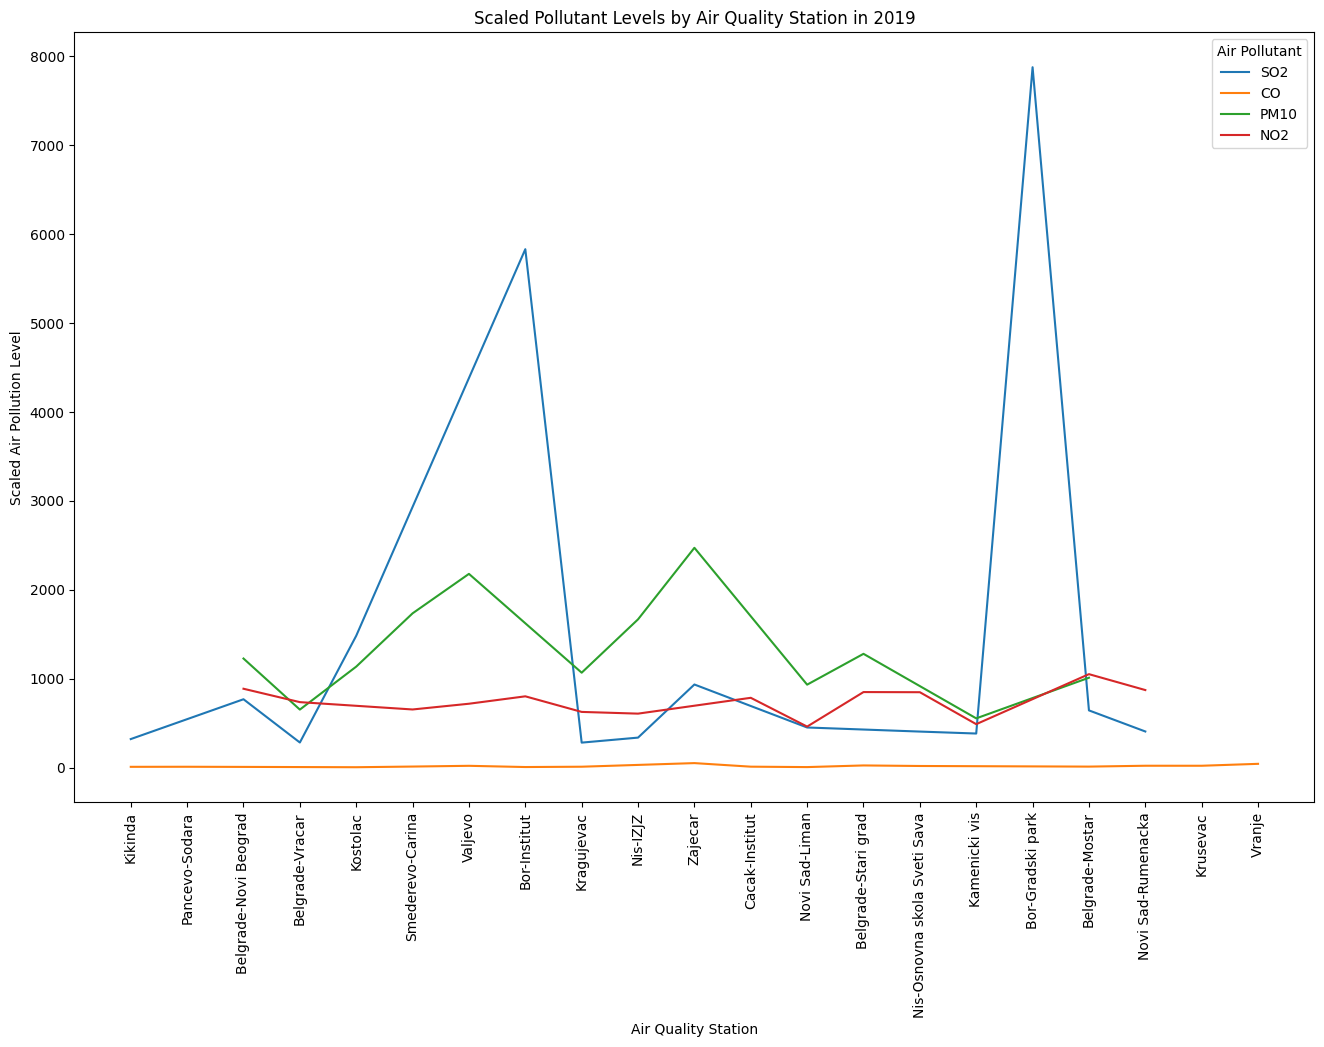

In [19]:
#data for 2019 and pollutants except SO3
data_2019 = year_data['year_2019']
data_2019 = data_2019[data_2019['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]

#scale pollutant levels by multiplying with a factor
data_2019['Scaled Pollution Level'] = data_2019['Air Pollution Level'] * 18

plt.figure(figsize=(16, 10))
sns.lineplot(data=data_2019, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)
plt.xticks(rotation=90)
plt.title('Scaled Pollutant Levels by Air Quality Station in 2019')
plt.xlabel('Air Quality Station')
plt.ylabel('Scaled Air Pollution Level')
plt.show()

<ipython-input-20-0bd93efa16f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['Scaled Pollution Level'] = data_2020['Air Pollution Level'] * 18
<ipython-input-20-0bd93efa16f3>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_2020, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)


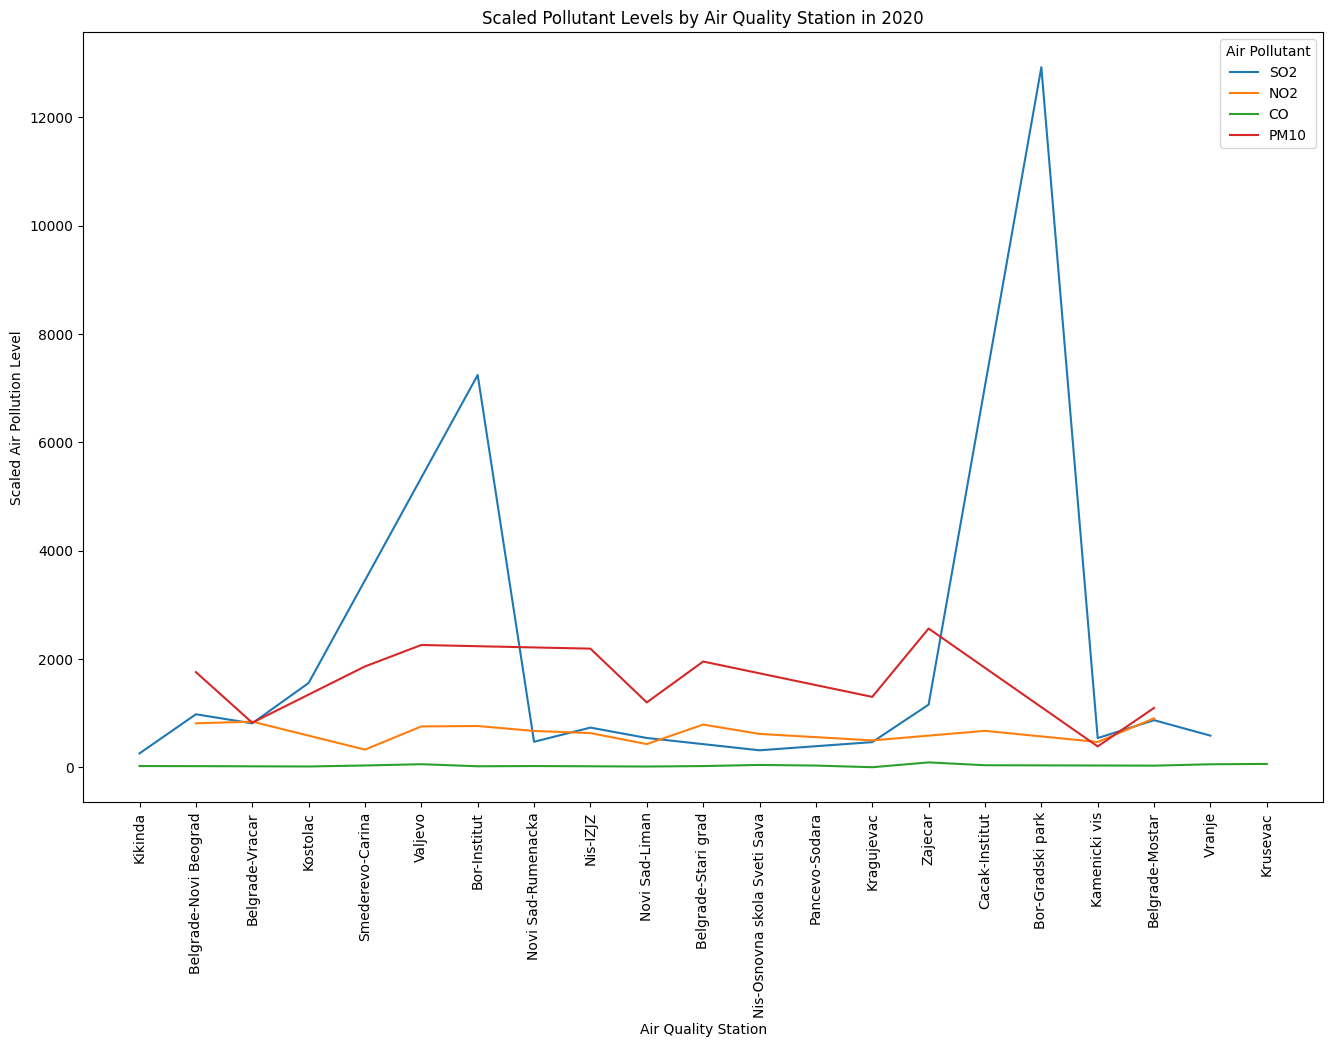

In [20]:
#data for 2020 and pollutants except SO3
data_2020 = year_data['year_2020']
data_2020 = data_2020[data_2020['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]

#scale pollutant levels by multiplying with a factor
data_2020['Scaled Pollution Level'] = data_2020['Air Pollution Level'] * 18

plt.figure(figsize=(16, 10))
sns.lineplot(data=data_2020, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)
plt.xticks(rotation=90)
plt.title('Scaled Pollutant Levels by Air Quality Station in 2020')
plt.xlabel('Air Quality Station')
plt.ylabel('Scaled Air Pollution Level')
plt.show()


<ipython-input-21-3e8691dbe6a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Scaled Pollution Level'] = data_2021['Air Pollution Level'] * 18
<ipython-input-21-3e8691dbe6a6>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_2021, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)


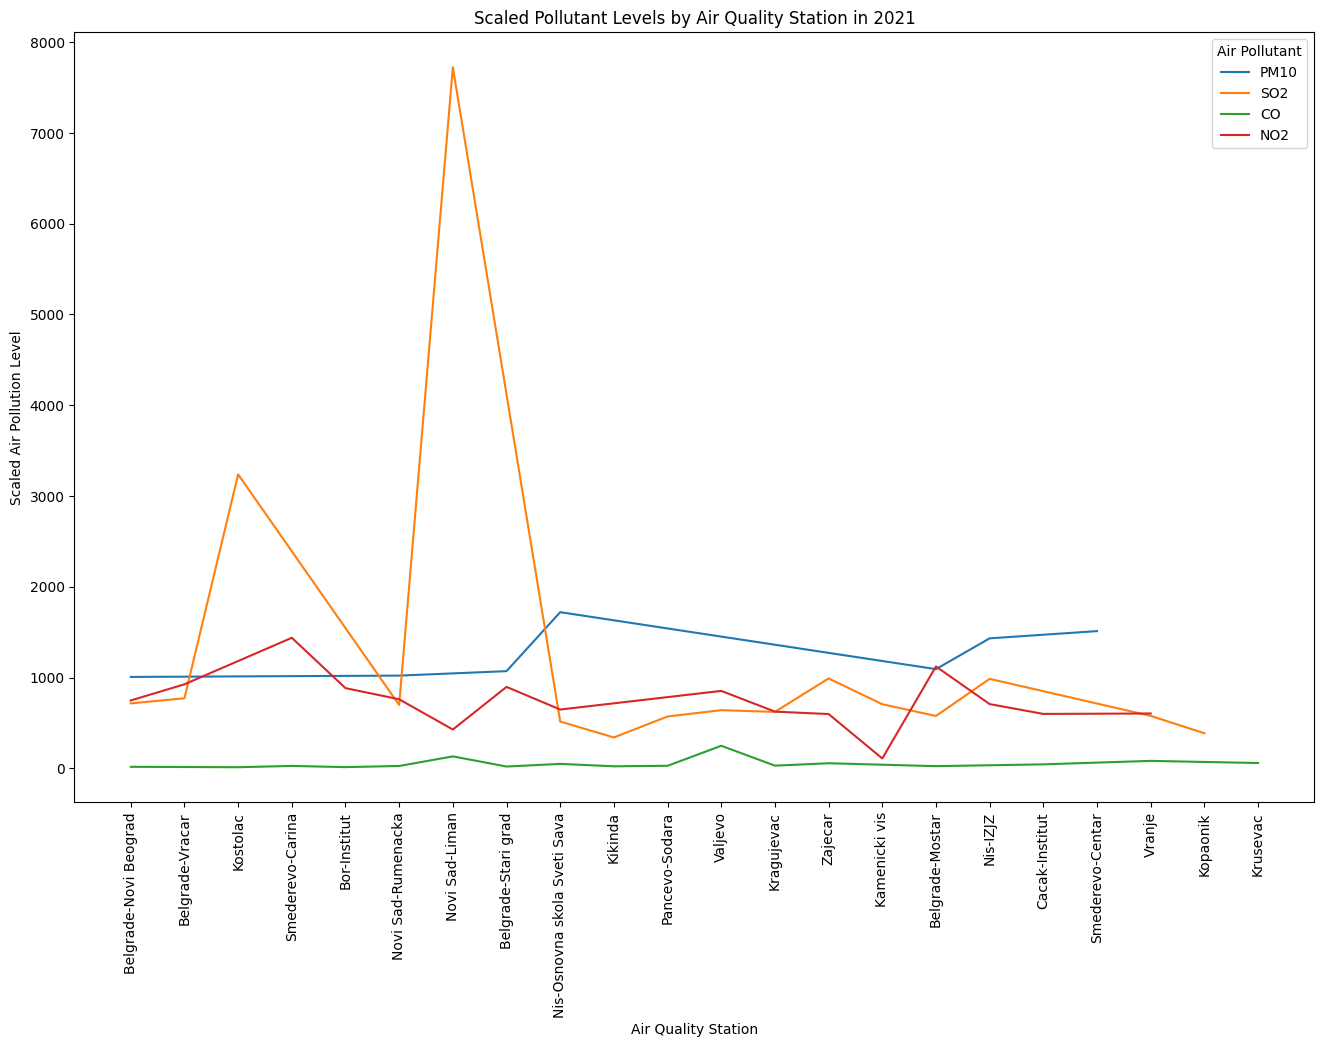

In [21]:
#data for 2021 and pollutants except SO3
data_2021 = year_data['year_2021']
data_2021 = data_2021[data_2021['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]

#scale pollutant levels by multiplying with a factor
data_2021['Scaled Pollution Level'] = data_2021['Air Pollution Level'] * 18

plt.figure(figsize=(16, 10))
sns.lineplot(data=data_2021, x='Air Quality Station Name', y='Scaled Pollution Level', hue='Air Pollutant', ci=None)
plt.xticks(rotation=90)
plt.title('Scaled Pollutant Levels by Air Quality Station in 2021')
plt.xlabel('Air Quality Station')
plt.ylabel('Scaled Air Pollution Level')
plt.show()


In [22]:
#interactive visualizations
#2021
data_2021 = year_data['year_2021']
data_2021 = data_2021[data_2021['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]
data_2021['Scaled Pollution Level'] = data_2021['Air Pollution Level'] * 18

average_data = data_2021.groupby(['Air Quality Station Name', 'Air Pollutant'])['Scaled Pollution Level'].mean().reset_index()

fig = px.line(average_data, x='Air Quality Station Name', y='Scaled Pollution Level', color='Air Pollutant',
             labels={'Scaled Pollution Level': 'Average Scaled Air Pollution Level'},
             title='Pollutant Levels by Cities in 2021')

#appearance
fig.update_layout(xaxis_title='Air Quality Station', yaxis_title='Average Scaled Air Pollution Level')
fig.update_traces(marker_line_color='black', mode='lines+markers', line_shape='linear')

all_cities = average_data['Air Quality Station Name'].unique()

fig.update_xaxes(categoryorder='array', categoryarray=all_cities)

fig.show()

<ipython-input-22-efd459b21677>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Scaled Pollution Level'] = data_2021['Air Pollution Level'] * 18


In [23]:
#2020
data_2020 = year_data['year_2020']
data_2020 = data_2020[data_2020['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]
data_2020['Scaled Pollution Level'] = data_2020['Air Pollution Level'] * 18

average_data = data_2020.groupby(['Air Quality Station Name', 'Air Pollutant'])['Scaled Pollution Level'].mean().reset_index()

fig = px.line(average_data, x='Air Quality Station Name', y='Scaled Pollution Level', color='Air Pollutant',
             labels={'Scaled Pollution Level': 'Average Scaled Air Pollution Level'},
             title='Pollutant Levels by Cities in 2020')  # Updated the title here

#appearance
fig.update_layout(xaxis_title='Air Quality Station', yaxis_title='Average Scaled Air Pollution Level')
fig.update_traces(marker_line_color='black', mode='lines+markers', line_shape='linear')

all_cities = average_data['Air Quality Station Name'].unique()

fig.update_xaxes(categoryorder='array', categoryarray=all_cities)

fig.show()

<ipython-input-23-6e4d464b0c2c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#2019
data_2019 = year_data['year_2019']
data_2019 = data_2019[data_2019['Air Pollutant'].isin(['CO', 'NO2', 'PM10', 'SO2'])]
data_2019['Scaled Pollution Level'] = data_2019['Air Pollution Level'] * 18

average_data = data_2019.groupby(['Air Quality Station Name', 'Air Pollutant'])['Scaled Pollution Level'].mean().reset_index()

fig = px.line(average_data, x='Air Quality Station Name', y='Scaled Pollution Level', color='Air Pollutant',
             labels={'Scaled Pollution Level': 'Average Scaled Air Pollution Level'},
             title='Pollutant Levels by Cities in 2019')  # Updated the title here

#appearance
fig.update_layout(xaxis_title='Air Quality Station', yaxis_title='Average Scaled Air Pollution Level')
fig.update_traces(marker_line_color='black', mode='lines+markers', line_shape='linear')

all_cities = average_data['Air Quality Station Name'].unique()

fig.update_xaxes(categoryorder='array', categoryarray=all_cities)

fig.show()

<ipython-input-24-639c9ae8489d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#**Geospatial approach**

In [25]:
df_2021 = year_data['year_2021']
pollutants = ['CO', 'NO2', 'PM10', 'SO2']
df_2021 = df_2021[df_2021['Air Pollutant'].isin(pollutants)]

gdf_2021 = gpd.GeoDataFrame(df_2021,
                           geometry=gpd.points_from_xy(df_2021['Longitude'], df_2021['Latitude']))

m = folium.Map(location=[gdf_2021['Latitude'].mean(), gdf_2021['Longitude'].mean()], zoom_start=10)
HeatMap(gdf_2021[['Latitude', 'Longitude']].values).add_to(m)

display(m)